In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
file_path = 'house_price(1).csv'
data = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'house_price(1).csv'

In [ ]:
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
print("Basic EDA:")
print(data.describe())
print("Missing Values:\n", data.isnull().sum())
print("Data Types:\n", data.dtypes)

Basic EDA:
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07
Missing Values:
 location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64
Data Types:
 location           object
size               object
total_sqft        float64
bath              float64


In [ ]:
mean = data['price_per_sqft'].mean()
std = data['price_per_sqft'].std()
data_mean_std = data[(data['price_per_sqft'] > mean - 3 * std) & (data['price_per_sqft'] < mean + 3 * std)]


In [ ]:
lower_bound = data['price_per_sqft'].quantile(0.05)
upper_bound = data['price_per_sqft'].quantile(0.95)
data_percentile = data[(data['price_per_sqft'] > lower_bound) & (data['price_per_sqft'] < upper_bound)]

In [ ]:
Q1 = data['price_per_sqft'].quantile(0.25)
Q3 = data['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
data_iqr = data[(data['price_per_sqft'] > Q1 - 1.5 * IQR) & (data['price_per_sqft'] < Q3 + 1.5 * IQR)]

In [ ]:
data['z_score'] = (data['price_per_sqft'] - mean) / std
data_zscore = data[(data['z_score'] > -3) & (data['z_score'] < 3)]

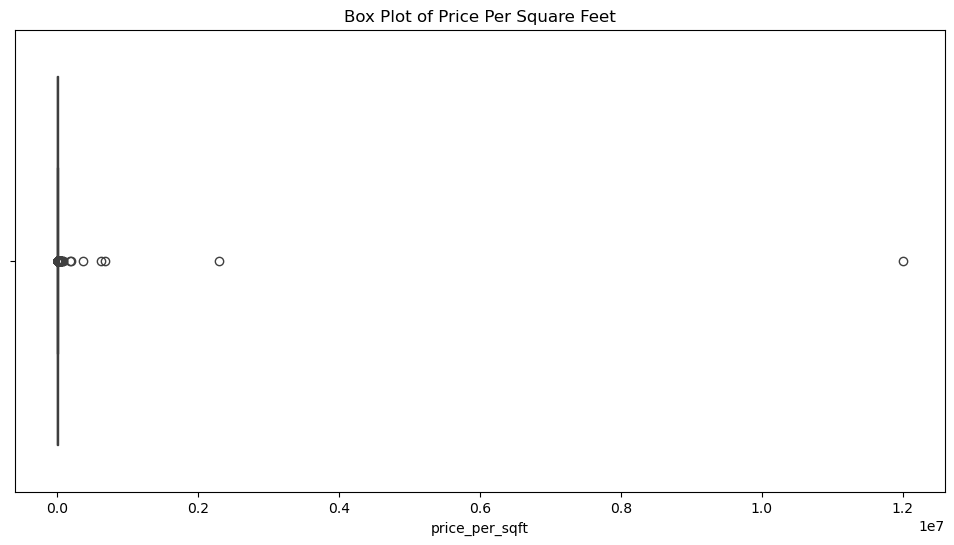

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='price_per_sqft')
plt.title('Box Plot of Price Per Square Feet')
plt.show()

In [ ]:
print("Skewness before transformation:", skew(data['price_per_sqft']))
print("Kurtosis before transformation:", kurtosis(data['price_per_sqft']))

Skewness before transformation: 108.26875024325159
Kurtosis before transformation: 12090.633538860382


In [ ]:
data['price_per_sqft_log'] = np.log1p(data['price_per_sqft'])

In [ ]:
print("Skewness after log transformation:", skew(data['price_per_sqft_log']))
print("Kurtosis after log transformation:", kurtosis(data['price_per_sqft_log']))

Skewness after log transformation: 1.4003259019533636
Kurtosis after log transformation: 9.203000543610957


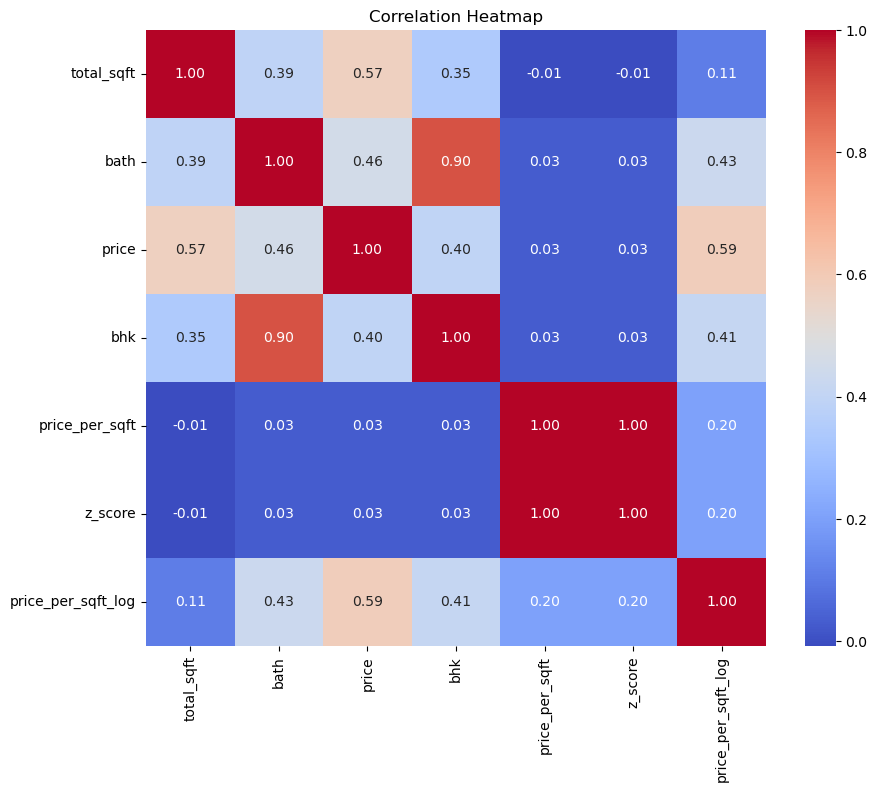

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

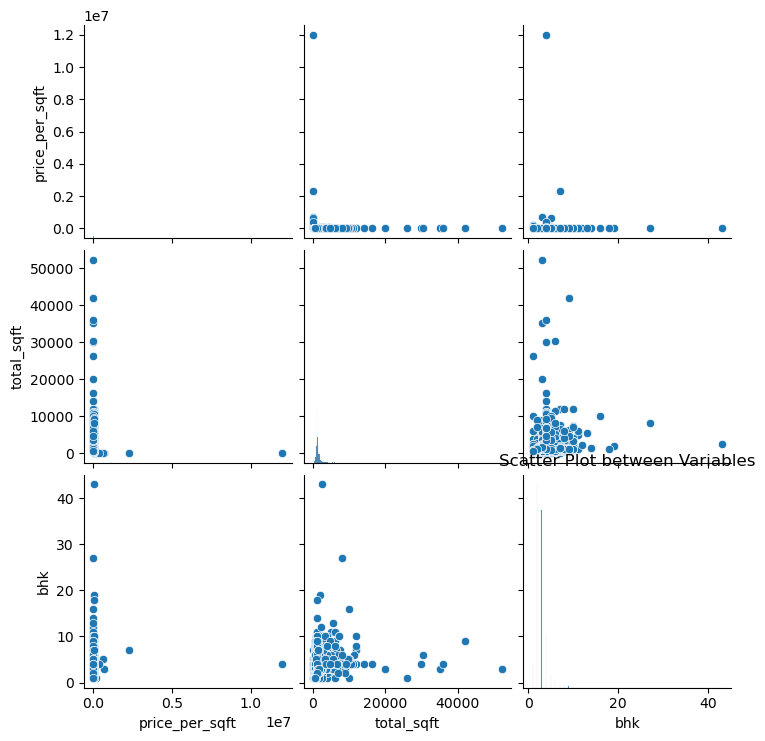

In [ ]:
# Q6: Scatter plot
sns.pairplot(data, vars=['price_per_sqft', 'total_sqft', 'bhk'])
plt.title('Scatter Plot between Variables')
plt.show()
